# Le camembert, ça pue

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib_tufte import *
setup()

## Raw data

In [2]:
df = pd.DataFrame({
	'year': [1, 2, 3],
	'chevaux': [30, 25, 20],
	'boeufs': [18, 9, 4]
})
df

,year,chevaux,boeufs
0,1,30,18
1,2,25,9
2,3,20,4


In [3]:
pd.DataFrame({
	'year': df.year,
	'frac chevaux': df.chevaux / (df.chevaux + df.boeufs),
	'frac boeufs': df.boeufs / (df.chevaux + df.boeufs)
})

,year,frac chevaux,frac boeufs
0,1,0.625000,0.375000
1,2,0.735294,0.264706
2,3,0.833333,0.166667


## Pie charts (unscaled)

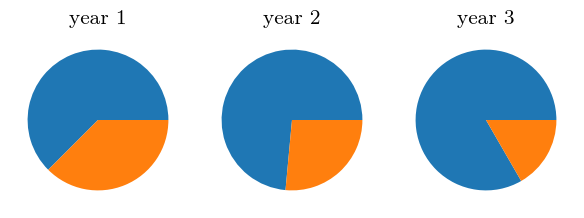

In [4]:
plt.close('all')
fig, ax = plt.subplots(ncols=3, dpi=100)
for idx, row in df.iterrows():
	ax[idx].pie([row.chevaux, row.boeufs], colors=['tab:blue', 'tab:orange'])
	ax[idx].set_title(f'year {row.year}')
plt.show(fig)

## Pie charts (scaled)

area is propto the total in the year

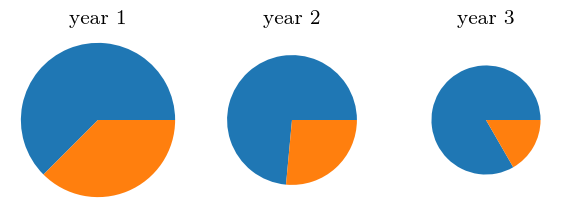

In [5]:
plt.close('all')
fig, ax = plt.subplots(ncols=3, dpi=100)
for idx, row in df.iterrows():
	ax[idx].pie([row.chevaux, row.boeufs], radius=np.sqrt((row.chevaux+row.boeufs)/40), colors=['tab:blue', 'tab:orange'])
	ax[idx].set_title(f'year {row.year}')
plt.show(fig)

## Stacked plot

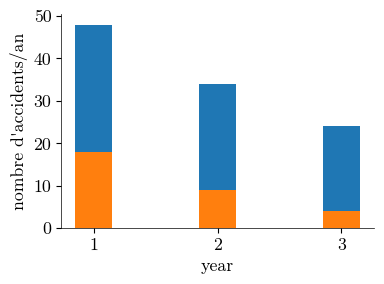

In [13]:
plt.close('all')
fig, ax = plt.subplots(dpi=100, figsize=(4, 3))
ax.bar(df.year, df.boeufs, 0.3, color='tab:orange')
ax.bar(df.year, df.chevaux, 0.3, bottom=df.boeufs, color='tab:blue')
ax.set_ylabel('nombre d\'accidents/an')
ax.set_xticks(df.year)
ax.set_xlabel('year')
plt.show(fig)

Avec guides de lecture

Problème : difficile de voir l'évolution individuelle

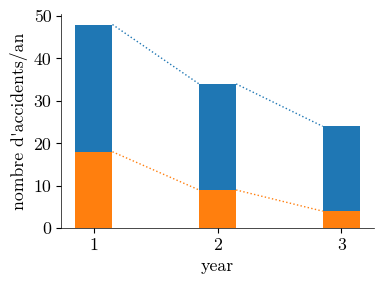

In [14]:
plt.close('all')
fig, ax = plt.subplots(dpi=100, figsize=(4, 3))
bars = []
bars.append(ax.bar(df.year, df.boeufs, 0.3, color='tab:orange'))
bars.append(ax.bar(df.year, df.chevaux, 0.3, bottom=df.boeufs, color='tab:blue'))
for bar in bars:
	for idx in range(len(bar.patches)-1):
		r1, r2 = bar.patches[idx], bar.patches[idx+1]
		b1, b2 = r1.get_bbox(), r2.get_bbox()
		ax.plot(
			[b1.xmax, b2.xmin], [b1.ymax, b2.ymax],
			linestyle='dotted',
			color=r1.get_facecolor()
		)
ax.set_xticks(df.year)
ax.set_xlabel('year')
ax.set_ylabel('nombre d\'accidents/an')
plt.show(fig)

Sur des axes séparés

Problème : difficile de voir la proportion

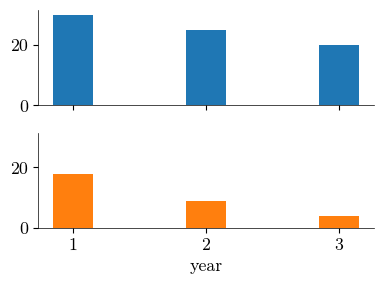

In [15]:
plt.close('all')
fig, ax = plt.subplots(dpi=100, nrows=2, sharex=True, sharey=True, figsize=(4, 3))
ax[0].bar(df.year, df.chevaux, 0.3, color='tab:blue')
ax[1].bar(df.year, df.boeufs, 0.3, color='tab:orange')
ax[1].set_xticks(df.year)
ax[1].set_xlabel('year')
# ax[1].set_ylim()
plt.show(fig)

Sur des axes inversés

Problème : possible seulement pour 2 catégories

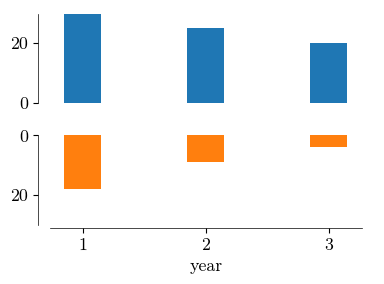

In [16]:
plt.close('all')
fig, ax = plt.subplot_mosaic(
	[[0], [1]],
	# gridspec_kw=dict(wspace=0.0, hspace=0.0),
	dpi=100,
	figsize=(4, 3)
)
ax[0].bar(df.year, df.chevaux, 0.3, color='tab:blue')
ax[1].bar(df.year, df.boeufs, 0.3, color='tab:orange')
ax[1].set_xticks(df.year)
ax[1].set_xlabel('year')
ax[0].xaxis.set_visible(False)
ax[0].spines.bottom.set_visible(False)
ax[0].set_ylim((0, 30))
ax[1].set_ylim((30, 0))
breathe(ax[0])
breathe(ax[1])
plt.show(fig)

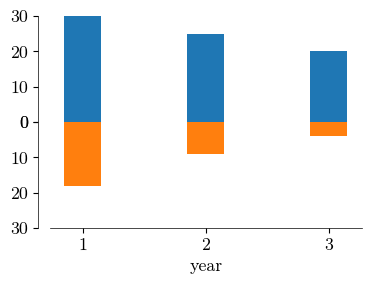

In [17]:
plt.close('all')
fig, ax = plt.subplot_mosaic(
	[[0], [1]],
	gridspec_kw=dict(wspace=0.0, hspace=0.0),
	dpi=100,
	figsize=(4, 3)
)
ax[0].bar(df.year, df.chevaux, 0.3, color='tab:blue')
ax[1].bar(df.year, df.boeufs, 0.3, color='tab:orange')
ax[1].set_xticks(df.year)
ax[1].set_xlabel('year')
ax[0].xaxis.set_visible(False)
ax[0].spines.bottom.set_visible(False)
ax[0].set_ylim((0, 30))
ax[1].set_ylim((30, 0))
breathe(ax[0], 'x')
breathe(ax[1], 'x')
plt.show(fig)

Même chose, mais moins d'encre/espace (stemplot)

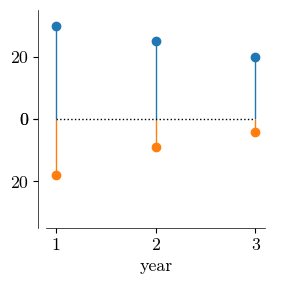

In [44]:
plt.close('all')
fig, ax = plt.subplot_mosaic(
	[[0], [1]],
	gridspec_kw=dict(wspace=0.0, hspace=0.0),
	dpi=100,
	figsize=(3, 3)
)
ax[0].stem(df.year, df.chevaux, linefmt='C1', markerfmt='C1o', basefmt='k:')
ax[1].stem(df.year, df.boeufs, linefmt='C2', markerfmt='C2o', basefmt='k:')
ax[1].set_xticks(df.year)
ax[1].set_xlabel('year')
ax[0].xaxis.set_visible(False)
ax[0].spines.bottom.set_visible(False)
ax[0].set_ylim((0, 35))
ax[1].set_ylim((35, 0))
breathe(ax[0], 'x')
breathe(ax[1], 'x')
plt.show(fig)